In [1]:
using Plots
using Random
using Distributions

# A. Solución de la ecuación de Poisson 2D.

La ecuación de Poisson en un espacio 2-dimensional para una función $\phi = \phi( x, y)$ es

\begin{equation}
\nabla^2 \phi = \rho \,\,.
\end{equation}

donde $\rho = \rho( x, y)$ representa la función fuente.

### 1. 

Utilice el método de diferencias finitas descrito en clase para resolver la ecuación de Poisson 2D en la región entre 0 ≤ x ≤ 1 y 0 ≤ y ≤ 1, utilizando la función de fuente ρ( x, y) = 2y. Las condiciones de frontera (tipo Dirichlet) serán

\begin{equation}
\left\{ \begin{array}{lcc}
             \phi(x,0)=0 \\
             \phi(0,y)=0 \\
             \phi(1,y)=y \\
             \phi(x,1)=x
             \end{array}
   \right.
\end{equation}

Para solucionar el problema, utilice una malla de discretización con ∆x = ∆y = h = 14 (clara-
mente con este valor tan grande para el espacio entre nodos no se obtendrá un resultado mu
preciso!).De esta forma, la malla tendrá 5 × 5 nodos localizados en las coordenadas

\begin{equation}
    x_i=(x_0,x_1,x_2,x_3,x_4)=\left(0,\frac{1}{4},\frac{1}{2},\frac{3}{4},1\right)
\end{equation}

\begin{equation}
    y_i=(y_0,y_1,y_2,y_3,y_4)=\left(0,\frac{1}{4},\frac{1}{2},\frac{3}{4},1\right)
\end{equation}

----

La discretización de la ecuación de Poisson está dada por 

\begin{equation}
\phi(x_{i+1},y_i)  + \phi(x_{i-1},y_i) + \phi(x_i,y_{i+1})  + \phi(x_i,y_{i-1}) - 4\phi(x_i,y_i) =  h^2 \rho (x_i,y_i)
\end{equation}

Definimos los parámetros de la ecuación

In [2]:
N = 5

Lx = 1
Ly = 1
hx = Lx/(N-1)
hy = Ly/(N-1)
x=LinRange(0,Lx,N)
y=LinRange(0,Ly,N)

5-element LinRange{Float64}:
 0.0,0.25,0.5,0.75,1.0

Ahora llenamos la matriz

In [3]:
ρ(x,y) = 2*y

#Boundary conditions
Bx0(x,y) = 0
BxL(x,y) = x

B0y(x,y) = 0
BLy(x,y) = y

function assemble_matrix(N)
    ipt = 0; npts = N^2;
    Δmat =zeros(N^2,N^2)
    #create the matrix
    for iy=1:N, ix=1:N; ipt+=1
        Δmat[ipt,ipt]=-4
        ixb = ix - 1; if ixb == 0; ixb = N end
        ixa = ix + 1; if ixa > N; ixa = 1  end
        i1 = (iy-1) * N + ixb
        i2 = (iy-1) * N + ixa
        i3 = (iy-2) * N + ix;  if i3 < 0; i3 =  mod(i3,npts); elseif i3 == 0; i3 = npts end
        i4 =  iy    * N + ix;  if i4 > npts; i4 -= npts end
        Δmat[i1,ipt] = 1
        Δmat[i2,ipt] = 1
        Δmat[i3,ipt] = 1
        Δmat[i4,ipt] = 1
    end
    #Add dirichlet boundary conditions
    for i in 1:N
        Δmat[i,:] = zeros(npts)
        Δmat[i,i] = 1
        Δmat[npts-N+i,:] = zeros(npts)
        Δmat[npts-N+i,npts-N+i] = 1
    end
    for i in 1:N
        Δmat[1+N*(i-1),:] = zeros(npts)
        Δmat[1+N*(i-1),1+N*(i-1)] = 1
        Δmat[4+N*(i-1),:] = zeros(npts)
        Δmat[4+N*(i-1),4+N*(i-1)] = 1
    end

    return Δmat
end

mat = assemble_matrix(N)

25×25 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0   0.0  …  0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0   0.0  …  0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  1.0  -4.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0   1.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  1.0   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0  …  0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   1.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 

Ahora, preparamos el lado derecho de la ecuación

In [4]:
function assemble_rhs(x,y,hx,hy,N)
    vec = zeros(N^2)
    for i in 1:N, j in 1:N
        vec[i+N*(j-1)] = hx*hy*ρ(x[i],y[j])
    end
    for i in 1:N
        vec[N^2-N+i]=BxL(x[i],y[i])
        vec[i] = Bx0(x[i],y[i])
    end
    for i in 1:N
        vec[4+N*(i-1)] = BLy(x[i],y[i])
        vec[1+N*(i-1)] = B0y(x[i],y[i])
    end
    vec
end
vec = assemble_rhs(x,y,hx,hy,N)

25-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.03125
 0.03125
 0.25
 0.03125
 0.0
 0.0625
 0.0625
 0.5
 0.0625
 0.0
 0.09375
 0.09375
 0.75
 0.09375
 0.0
 0.25
 0.5
 1.0
 1.0

Resolvemos el sistema de ecuaciones

In [5]:
u = mat\vec;
u

25-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.05244565217391303
 0.13505434782608694
 0.25
 0.11941964285714285
 0.0
 0.10597826086956519
 0.26902173913043476
 0.5
 0.2589285714285714
 0.0
 0.164945652173913
 0.39755434782608695
 0.75
 0.47879464285714285
 0.0
 0.25
 0.5
 1.0
 1.0

In [6]:
u=reshape(u, (N, N))

5×5 Array{Float64,2}:
 0.0  0.0        0.0       0.0       0.0
 0.0  0.0524457  0.105978  0.164946  0.25
 0.0  0.135054   0.269022  0.397554  0.5
 0.0  0.25       0.5       0.75      1.0
 0.0  0.11942    0.258929  0.478795  1.0

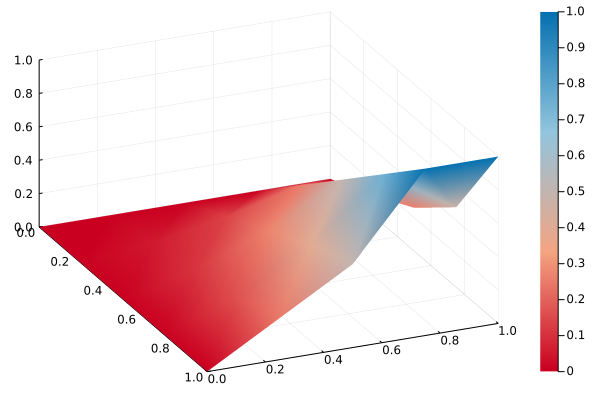

┌ Warning: camera: -30° ∉ [0°, 90°]
└ @ Plots /home/wind/.julia/packages/Plots/AJMX6/src/backends/gr.jl:1438


In [7]:
my_cg = my_cg = cgrad(:RdBu_4)
plot(x,y,u,st=:surface,c=my_cg,camera=(-30,30))

### 2. 

Utilice el métode de relajación SOR para resolver el mismo problema utilizando el parámetro ω = 1.4, una tolerancia del orden de 10−8 y una malla con 100 nodos en cada dirección.

----

El Método de Sobre-Relajación Sucesiva ( Succesive Over-Relaxation: SOR) Está dado por

\begin{equation}
\phi^*_{i,j} = (1-\omega) \phi_{i,j} + \frac{1}{4} \omega \left( \phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - h^2\rho_{i,j}\right)
\end{equation}

\begin{equation}
\phi^*_{i,j} = \phi_{i,j} - \frac{1}{4} \omega \left(4\phi_{i,j} - \phi_{i+1,j} - \phi_{i-1,j} - \phi_{i,j+1} - \phi_{i,j-1} + h^2\rho_{i,j}\right)
\end{equation}

\begin{equation}
\phi^*_{i,j} = \phi_{i,j} - \frac{1}{4} \omega R_0
\end{equation}

donde $\omega$ es un parametro de relajación. El valor $\omega = 1$ recupera el método de Gauss-Seidel, valores $\omega<1$ produce  *sub-relajación* (i.e. se mantiene una proporción de la solución anterior) y un valor $\omega >1$ produce *sobre-relajación* (la nueva solución se mueve lejos de la anterior solución que en el modelo de Gauss-Seidel).

$R_0$ es el residuo,que debe ser cercano a 0 para que se alcance la convergencia.

In [8]:
nx = 100
ny = 100
Lx = 1
Ly = 1
hx = Lx/(nx-1)
hy = Ly/(ny-1)
x=LinRange(0,Lx,nx)
y=LinRange(0,Ly,ny)
ρ(x,y)=2*y
ω = 1.4
ϕ = rand(Float64, (ny, nx))
#Boundary conditions
Bx0(x,y) = 0
BxL(x,y) = x

B0y(x,y) = 0
BLy(x,y) = y

BLy (generic function with 1 method)

Converge after 8901.0 steps, Res: 9.982128292833985e-9


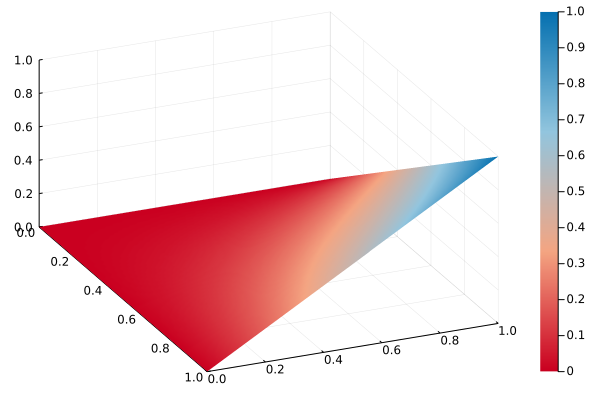

┌ Warning: camera: -30° ∉ [0°, 90°]
└ @ Plots /home/wind/.julia/packages/Plots/AJMX6/src/backends/gr.jl:1438


In [9]:
function Boundary_conditions(Mat,x,y)
    for i in eachindex(x)
        Mat[1,i]=Bx0(x[i],y[1])
        Mat[length(y),i]=BxL(x[i],y[length(y)])
    end
    for i in eachindex(y)
        Mat[i,1]=B0y(x[1],y[i])
        Mat[i,length(x)]=BLy(x[length(x)],y[i])
    end
end

function Relax(ϕ,x,y,nx,ny,hx,hy;ω=1,max_iter=5e4,tol=1e-8)
    ϕ_new = ϕ
    for a in 1:max_iter
        Res=0
        for i in 2:nx-1, j in 2:ny-1
            R = 4*ϕ[j,i]-ϕ[j,i-1]-ϕ[j,i+1]-ϕ[j+1,i]-ϕ[j-1,i]+hx*hy*ρ(x[i],y[j])
            ϕ_new[j,i] = ϕ[j,i]-0.25*ω*R
            Res+=abs(R)
        end
        ϕ=ϕ_new
        if Res < tol; println("Converge after ", a," steps, Res: ", Res); break end
        if a==max_iter; println("Dint converge, Res: ", Res) end
    end
end

Boundary_conditions(ϕ,x,y)
Relax(ϕ,x,y,nx,ny,hx,hy,ω=ω)
my_cg = cgrad(:RdBu_4)
plot(x,y,ϕ,st=:surface,c=my_cg,camera=(-30,30))

# B. Potencial Gravitacional de una fuente esféricamente simétrica
Plantee y resuelva el problema de una partícula con simetría esférica y masa total M en el centro de
un espacio bidimensional. Estime el potencial gravitacional que se genera en su entorno. Asuma la
función de masa y las condiciones de frontera que considere adecuadas para encontrar la solución.

----

La ecuación de Poisson para la gravedad es

\begin{equation}
\nabla^2 \phi = -4\pi G\rho \,\,.
\end{equation}

Donde $\rho$ es la densidad del objeto. En el caso de una partícula puntual, toda la masa de este se concetra en un punto, obteniendo que

\begin{equation}
\nabla^2 \phi = -4\pi GM\delta(\vec{r}) \,\,.
\end{equation}

Usando unidades de masas solares, años y unidades astronómicas, la constante de Cavendish toma el valor teórico

\begin{equation}
    G = 4\pi^2\;.
\end{equation}

Vamos a colocar un objeto de 1 masa solar y el dominio será de 1000 unidades astronómicas. Las condiciones de frontera para este problema deberían ser que la función tiende a 0 en el infinito, sin embargo esto no es posible computacionalmente, por lo que se trata de hacer un dominio lo suficientemente grande como para decir que el potencial en ese punto es cero. Hay algunas alternativas más sofisticadas `"Simpson, T. (1992). Open‐boundary relaxation. Microwave and Optical Technology Letters, 5(12), 627-633."` para colocar fronteras abiertas en el método de relajación, sin embargo no las implementaremos en este cuaderno. 

In [12]:
nx = 90
ny = 90
Lx = 1000
Ly = 1000
hx = (Lx+Lx)/(nx-1)
hy = (Ly+Ly)/(ny-1)
x=LinRange(-Lx,Lx,nx)
y=LinRange(-Ly,Ly,ny)
M = 1
G = 4*pi^2
ρ(x,y)= if x==0 && y==0; -4*pi*G*M; else 0 end
ω = 1.0
ϕ = rand(Uniform(-20,20), (ny, nx))

#Boundary conditions
Bx0(x,y) = 0
BxL(x,y) = 0
B0y(x,y) = 0
BLy(x,y) = 0

Boundary_conditions(ϕ,x,y)
Relax(ϕ,x,y,nx,ny,hx,hy,ω=ω)

Converge after 16049.0 steps, Res: 9.994442868680898e-9


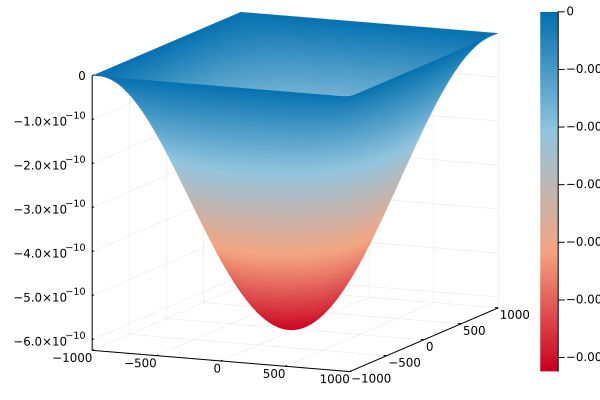

In [13]:
my_cg = cgrad(:RdBu_4)
plot(x,y,ϕ,st=:surface,c=my_cg)